In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# Part 1: Data Preparation

data = pd.read_csv('./housing_prices.csv')

filtered = data.filter(items=['TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea'])
print(filtered)

      TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  GarageArea
0             856       856       854       1710         548
1            1262      1262         0       1262         460
2             920       920       866       1786         608
3             756       961       756       1717         642
4            1145      1145      1053       2198         836
...           ...       ...       ...        ...         ...
1455          953       953       694       1647         460
1456         1542      2073         0       2073         500
1457         1152      1188      1152       2340         252
1458         1078      1078         0       1078         240
1459         1256      1256         0       1256         276

[1460 rows x 5 columns]


In [3]:
# Part 2: Implementing PCA

# 1. Standardize data X
# one line of code. Different from zero-centering, because want to scale data too since features are in different units

scaler = StandardScaler()
s_data = scaler.fit_transform(filtered)

# 2. Calculate the covariance matrix
# suggested function: numpy.cov --> expects samples as columns, so need to transpose X

covariance = np.cov(np.transpose(s_data))

# 3. Calculate eigenvectors and eigenvalues of covariance matrix
# suggested function: numpy.linalg.eigh
eigenvalues, eigenvectors = np.linalg.eigh(covariance)

# 4. Sort eigenvalues in descending order, along with corresponding eigenvectors
# each column of eigenvector maxtrix corresponds to principal component. First column of sorted eigenvector matrix will be principle component that captures most variability
idx = eigenvalues.argsort()[::-1]   
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

# 5. Select the first k eigenvectors to make projection matrix W, where k is number of new dimensions to project to (we want two dimensions)
projection_matrix = eigenvectors[:,0:2]
if projection_matrix[0, 0] < 0:
    projection_matrix[:, 0] *= -1

# 6. Transform standardized data X using projections matrix W, using dot product. X dot W
transformed_data = np.dot(s_data, projection_matrix)
# 7. Print the head of the new components (first 5 entires of the two components)
print(transformed_data[:5])

[[-0.17416715  1.46620681]
 [ 0.01304557 -1.06278444]
 [ 0.18877666  1.46163623]
 [ 0.03083576  1.29749135]
 [ 1.67649623  1.82873492]]


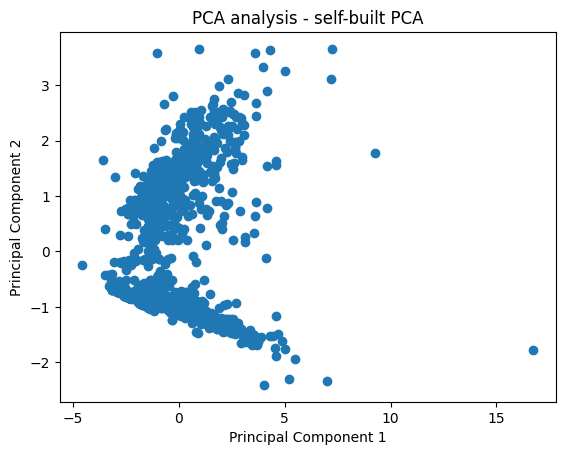

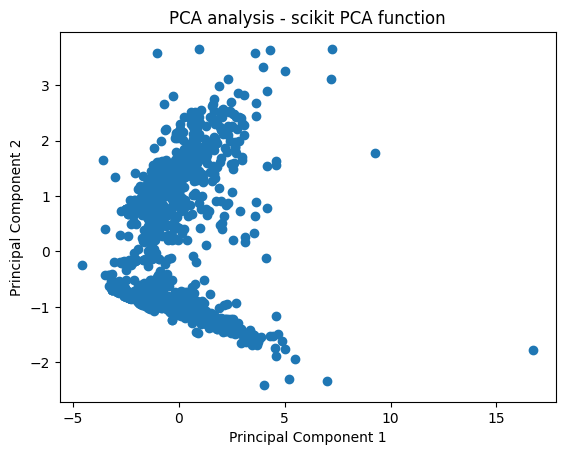

In [7]:
# Part 3: Analyze Results

# 1. Create scatterplot of two components. Label axes and add title
plt.scatter(transformed_data[:,0], transformed_data[:,1])
plt.title("PCA analysis - self-built PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# 2. Verify algorithm. Take original X dataframe and use scikit-learn PCA function using 2 components. Standardize data
pca = PCA(n_components=2)
pca.fit(s_data)
pca_data = pca.transform(s_data)
plt.scatter(pca_data[:,0], pca_data[:,1])
plt.title("PCA analysis - scikit PCA function")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
